# Bibliotecas utilizadas

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Tarea 1

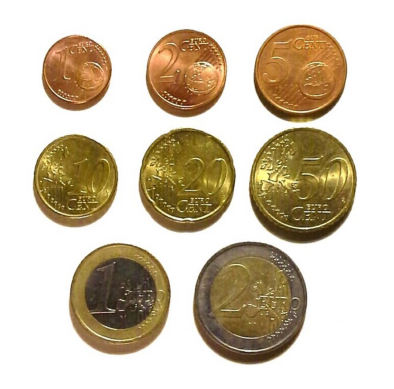

In [3]:
image = cv2.imread("imgs/coins_with_shadow.jpg", cv2.IMREAD_COLOR_RGB)

plt.axis('off')
plt.imshow(image, cmap='gray')

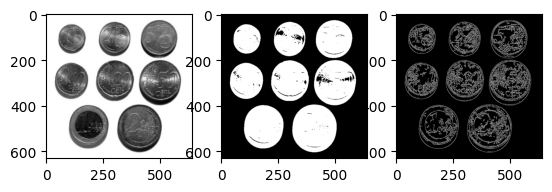

In [6]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image_gray = cv2.GaussianBlur(image_gray, (5, 5), 0)

canny = cv2.Canny(image, 50, 150)

_, threshold_image = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(threshold_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(canny, cmap='gray')

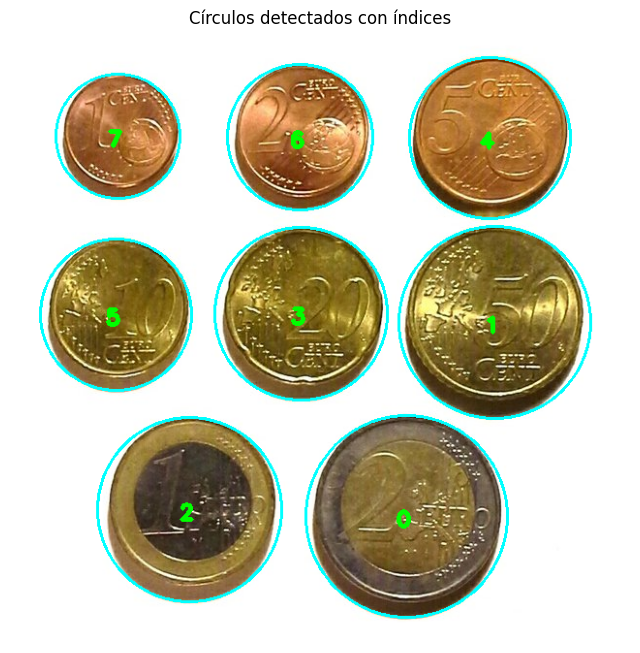

In [7]:
contours, _ = cv2.findContours(
    threshold_image,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

coins_d = {
    '200': 25.75,
    '100': 23.25,
    '50': 24.25,
    '20': 22.25,
    '10': 19.75,
    '5': 21.25,
    '2': 18.75,
    '1': 16.25
}

coins_invert = {v: int(k) for k, v in coins_d.items()}

contours = [c for c in contours if cv2.contourArea(c) > 800]
contours = sorted(contours, key=lambda c: cv2.contourArea(c), reverse=True)

contours_areas = [cv2.contourArea(c) for c in contours]
contours_circles = [cv2.minEnclosingCircle(c) for c in contours]

current = []
image_copy = image.copy()

for i, c in enumerate(contours_circles):
    x, y = c[0]
    r = c[1]
    cv2.circle(image_copy, (int(x), int(y)), int(r), (0, 255, 255), 2)
    cv2.putText(
        image_copy,
        f"{i}",
        (int(x) - 10, int(y) + 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,
        (0, 255, 0),
        3
    )

plt.figure(figsize=(8, 8))
plt.imshow(image_copy, cmap='gray')
plt.title("Círculos detectados con índices")
plt.axis("off")
plt.show()

In [13]:
coin_index = input("Introduce el número de la moneda de 1€: ")

PIXEL_MM_RATIO = (contours_circles[int(coin_index)][1] * 2) / coins_d['100']
u = 0
current = []

for idx, c in enumerate(contours_circles):
    (x, y), r = c
    d = (r * 2) / PIXEL_MM_RATIO
    # u = sum([abs(k - d) for k in coins_invert]) / len(coins_invert)
    k = min(coins_invert, key=lambda k: abs(k - d) - u)
    print(idx, sorted([(coins_invert[k], abs(k - d)) for k in coins_invert], key=lambda t: t[1]))
    current.append(coins_invert[k])

print("Suma total:", sum(current) / 100, current)


0 [(200, 0.16575240027212956), (50, 1.3342475997278704), (100, 2.3342475997278704), (20, 3.3342475997278704), (5, 4.33424759972787), (10, 5.83424759972787), (2, 6.83424759972787), (1, 9.33424759972787)]
1 [(50, 0.046159384396318615), (100, 0.9538406156036814), (200, 1.5461593843963186), (20, 1.9538406156036814), (5, 2.9538406156036814), (10, 4.453840615603681), (2, 5.453840615603681), (1, 7.953840615603681)]
2 [(100, 0.0), (50, 1.0), (20, 1.0), (5, 2.0), (200, 2.5), (10, 3.5), (2, 4.5), (1, 7.0)]
3 [(20, 0.43991635436533727), (5, 0.5600836456346627), (100, 1.4399163543653373), (10, 2.0600836456346627), (50, 2.4399163543653373), (2, 3.0600836456346627), (200, 3.9399163543653373), (1, 5.560083645634663)]
4 [(10, 0.7328813156178171), (5, 0.7671186843821829), (2, 1.732881315617817), (20, 1.767118684382183), (100, 2.767118684382183), (50, 3.767118684382183), (1, 4.232881315617817), (200, 5.267118684382183)]
5 [(2, 0.4971774353397116), (10, 0.5028225646602884), (5, 2.0028225646602884), (1, 2